In [20]:
from random import randint
import matplotlib.pyplot as plt
import matplotlib
import pylab
# class to define relation between p and e ranking . Total of 3^5*3^5 documents were generated 
class Relation:
    def __init__(self,p_arr):
        self.p_arr=p_arr
        self.e_arr=[]
    def append_e(self,e_arr):
        self.e_arr.append(e_arr)
        
def create_temp_arr():
    temp=[]
    for ind in range(0,5):
        index=randint(0,2)
        ##val=arr[index]
        temp.append(index)
    return temp
arr=["N","R","HR"]
rel_arr=[]
for i in range(0,243):
    relation=Relation(create_temp_arr())
    for j in range(0,243):
        relation.append_e(create_temp_arr())
    rel_arr.append(relation)
print("done")
print(len(rel_arr))

done
243


In [17]:
# class to implement binary evaluation . precision , recall and err
class BinaryEvaluation:
    # construcor takes the argument of for how many ranks we want to calculate 
    def __init__(self,k):
        self.rank_k=k
    # index is for which index of p and e we want to calculate    
    def calculate_precision(self,index):
        k=self.rank_k
        relation=rel_arr[index]
        p_arr=relation.p_arr
        e_arr=relation.e_arr
        pre_arr=[]
        rel_doc=self.calc_relevant_document(p_arr,self.rank_k)
        precison=rel_doc/k
        pre_arr.append(precison)
        for i in range(0,243):
            rel_doc=self.calc_relevant_document(e_arr[i],self.rank_k)
            precison=rel_doc/k
            pre_arr.append(precison)
        return pre_arr
    # to calculate recall for index
    def calc_recall(self,index):
        k=self.rank_k
        relation=rel_arr[index]
        p_arr=relation.p_arr
        e_arr=relation.e_arr
        pre_arr=[]
        rel_doc=self.calc_relevant_document(p_arr,self.rank_k)
        tot_rel=self.calc_relevant_document(p_arr,0)
        if(tot_rel==0):
            tot_rel=1
        precison=rel_doc/tot_rel
        pre_arr.append(precison)
        for i in range(0,243):
            rel_doc=self.calc_relevant_document(e_arr[i],self.rank_k)
            tot_rel=self.calc_relevant_document(e_arr[i],0)
            if(tot_rel==0):
                tot_rel=1
            precison=rel_doc/tot_rel
            pre_arr.append(precison)
        return pre_arr
    # internal method to calcuate total relevant documents
    def calc_relevant_document(self,arr,rank_k):
        tot=0
        max_index=len(arr)
        if(rank_k>0):
            max_index=rank_k
        for i in range(0,max_index):
            if(arr[i]==1 or arr[i]==2):
                tot=tot+1
        return tot
    # to calcuate avergae precison
    def avg_precision(self,index):
        k=self.rank_k
        relation=rel_arr[index]
        p_arr=relation.p_arr
        e_arr=relation.e_arr
        prr_sum=0
        avg_arr=[]
        for i in range(0,k):
            if(p_arr[i]==1 or p_arr[i]==2):
                rel_doc=self.calc_relevant_document(p_arr,i+1)
                pre=rel_doc/(i+1)
                prr_sum=prr_sum+pre
        prr_avg_pre=prr_sum/5
        if(prr_avg_pre>0):
            avg_arr.append(prr_avg_pre)
        for i in range(0,243):
            e_temp_arr=e_arr[i]
            prr_sum=0
            for i in range(0,k):
                if(e_temp_arr[i]==1 or e_temp_arr[i]==2):
                    rel_doc=self.calc_relevant_document(e_temp_arr,i+1)
                    pre=rel_doc/(i+1)
                    prr_sum=prr_sum+pre
            if(prr_sum>0.0):
                prr_avg_pre=prr_sum/k
                avg_arr.append(prr_avg_pre)
        return avg_arr
binary=BinaryEvaluation(3)
print(binary.avg_precision(10))        

[0.4, 0.16666666666666666, 1.0, 0.16666666666666666, 0.5555555555555555, 0.3333333333333333, 0.16666666666666666, 1.0, 0.16666666666666666, 1.0, 0.38888888888888884, 0.38888888888888884, 0.38888888888888884, 0.16666666666666666, 0.3333333333333333, 0.38888888888888884, 0.38888888888888884, 0.6666666666666666, 0.1111111111111111, 0.5555555555555555, 0.3333333333333333, 1.0, 0.6666666666666666, 1.0, 0.3333333333333333, 0.38888888888888884, 0.16666666666666666, 1.0, 1.0, 1.0, 0.6666666666666666, 0.3333333333333333, 0.6666666666666666, 1.0, 1.0, 0.38888888888888884, 0.38888888888888884, 1.0, 0.3333333333333333, 1.0, 0.16666666666666666, 0.5555555555555555, 0.5555555555555555, 0.38888888888888884, 0.16666666666666666, 1.0, 0.1111111111111111, 0.16666666666666666, 0.3333333333333333, 0.5555555555555555, 0.1111111111111111, 1.0, 0.38888888888888884, 0.6666666666666666, 0.5555555555555555, 0.38888888888888884, 1.0, 0.16666666666666666, 0.6666666666666666, 0.6666666666666666, 0.1666666666666666

In [18]:
import math
# class to calcualte ndcg and err based on the relevance of document . 
# 0- means document not relevant 
# 1 - means document relevant
# 2 means document highely relevant 
# based on the values 0,1 and 2 values are calculated for the algorithm  
class Multigraded:
    def __init__(self,rank_k):
        self.rank_k=rank_k
        self.relv_scale=[0,1,2]
    def find_dcg(self,arr):
        tot_dcg=0
        for i in range(0,self.rank_k):
            tot_dcg=tot_dcg+(math.pow(2,arr[i])-1)/(math.log(i+2,2))
        return tot_dcg
    # function to find best dcg in the whole combilation of simulation . The normalization will be done based on the
    # output value of it 
    def find_best_dcg(self):
        best_dcg=0
        for i in range(0,243):
            relation=rel_arr[i]
            p_arr=relation.p_arr
            e_arr=relation.e_arr
            temp_dcg=self.find_dcg(p_arr)
            if(temp_dcg>best_dcg):
                best_dcg=temp_dcg
            for j in range(0,243):
                e_temp_arr=e_arr[j]
                temp_dcg=self.find_dcg(e_temp_arr)
                if(temp_dcg>best_dcg):
                    best_dcg=temp_dcg
        self.best_dcg=best_dcg
        return best_dcg
    # function to find ndcg for index
    def find_ndcg(self,index):
        ndcg=[]
        relation=rel_arr[index]
        p_arr=relation.p_arr
        e_arr=relation.e_arr
        temp_dcg=self.find_dcg(p_arr)/self.best_dcg
        ndcg.append(temp_dcg)
        for j in range(0,243):
            e_temp_arr=e_arr[j]
            temp_dcg=self.find_dcg(e_temp_arr)/self.best_dcg
            ndcg.append(temp_dcg)
        return ndcg
    # function  to find ERR for a index
    def err(self,index):
        relation=rel_arr[index]
        p_arr=relation.p_arr
        e_arr=relation.e_arr
        err_k=0
        err_arr=[]
        for i in range(0,self.rank_k):
            prod_val=1
            for j in range(0,i):
                prod_val=prod_val*(1-(math.pow(2,p_arr[j]-1/4)))
            err_k=err_k+((math.pow(2,p_arr[i]-1/4)*prod_val)/(i+1))
        err_arr.append(err_k)
        for k in range(0,243):
            e_temp=e_arr[k]
            err_k=0
            for i in range(0,self.rank_k):
                prod_val=1
                for j in range(0,i):
                    prod_val=prod_val*(1-(math.pow(2,e_temp[i]-1/4)))
                err_k=err_k+((math.pow(2,e_temp[i]-1/4)*prod_val)/(i+1))
            err_arr.append(err_k)
        return err_arr
multi=Multigraded(3)
multi.find_best_dcg()
print(len(multi.find_ndcg(5)))
print(len(multi.err(10)))

244
244


In [19]:
# class to evaluate the offline results . calculate the total avergae precison, ndcg and err 
class OfflineResults:
    # calculates the e proption wins for average_precison
    def delta_measure_avg_pre(self):
        count=0
        tot_count=0
        for i in range(0,243):
            data=binary.avg_precision(i)
            tot_count=tot_count+len(data)
            p_value=data[0]
            for j in range(1,len(data)):
                e_val=data[j]
                if(e_val>p_value):
                    count=count+1
        return (count/tot_count)
    # calculates the e proption wins for ndcg
    def delta_measure_ndgc(self):
        count=0
        tot_count=0
        for i in range(0,243):
            data=multi.find_ndcg(i)
            tot_count=tot_count+len(data)
            p_value=data[0]
            for j in range(1,len(data)):
                e_val=data[j]
                if(e_val>p_value):
                    count=count+1
        return(count/tot_count)
    # calculates the e proption wins for err
    def delta_measure_err(self):
        count=0
        tot_count=0
        for i in range(0,243):
            data=multi.err(i)
            tot_count=tot_count+len(data)
            p_value=data[0]
            for j in range(1,len(data)):
                e_val=data[j]
                if(e_val>p_value):
                    count=count+1
        return (count/tot_count)
offlineResults=OfflineResults()
avg_pre=[]
ndgc=[]
err=[]
avg_pre.append(offlineResults.delta_measure_avg_pre())
ndgc.append(offlineResults.delta_measure_ndgc())
err.append(offlineResults.delta_measure_err())
print(avg_pre)
print(ndgc)
print(err)


[0.6925409232710575]
[0.468764757471497]
[0.5768063145112325]


In [5]:
# class to hold the structure data , for each document the relevance and algo from which it came
class RankingData:
    def __init__(self,relevance,algo):
        self.relevance=relevance
        self.algo=algo
# class to implement team draft interleaving algorithm 
class TeamDraft:
    # constructor rank_merge is the number of ranks we want to merge
    def __init__(self,rank_merge):
        self.rank_merge=rank_merge
    # merge e and p based on the index given
    def merge_algo(self,index):
        merge_algo=[]
        relation=rel_arr[index]
        p_arr=relation.p_arr
        e_arr=relation.e_arr
        e_index=randint(0,242)
        e_temp=e_arr[e_index]
        count=0
        counter_p=0
        counter_e=0
        while count<self.rank_merge:
            index=randint(0,1)
            if(index==0):
                relv_docu=p_arr[counter_p]
                counter_p=counter_p+1
                rankingData=RankingData(relv_docu,"P")
                merge_algo.append(rankingData)
            else:
                relv_docu=e_temp[counter_e]
                counter_e=counter_e+1
                rankingData=RankingData(relv_docu,"E")
                merge_algo.append(rankingData)
            count=count+1
            if(count<self.rank_merge):
                if(index==0):
                    relv_docu=e_temp[counter_e]
                    counter_e=counter_e+1
                    rankingData=RankingData(relv_docu,"E")
                    merge_algo.append(rankingData)
                else:
                    relv_docu=p_arr[counter_p]
                    counter_p=counter_p+1
                    rankingData=RankingData(relv_docu,"P")
                    merge_algo.append(rankingData)
                count=count+1
        return merge_algo
    # function to find algos based on the clicks of the documents . click_arr->click arr of user 
    # algo_merge_arr-> merge list of 2 algorithms 
    def find_algo_clicks(self,click_arr,algo_merge_arr):
        algo_arr=[]
        for i in range(0,len(click_arr)):
            index=click_arr[i]
            rankingData=algo_merge_arr[index]
            algo_arr.append(rankingData.algo)
        return algo_arr
    
team_draft=TeamDraft(10)
merge_algo=team_draft.merge_algo(randint(0,242))
clicks=[0,1,2,3,4,5,6,7,8,9]
team_draft.find_algo_clicks(clicks,merge_algo)

['P', 'E', 'E', 'P', 'E', 'P', 'P', 'E', 'E', 'P']

In [6]:
filepath = 'search.txt'  
data_arr=[]
with open(filepath) as fp:  
    line = fp.readline()
    while line:
        temp=line.split()
        data_arr.append(temp)
        line = fp.readline()
print(len(data_arr))

100000


In [38]:
# class to implemet the RCM model 
class RCM:
    def __init__(self):
        self.sessions=0
        self.queries=0
        self.clicks=0
        self.prob_rcm=0
    # function to calculate the total number of sessions    
    def get_sessions(self):
        for i in range(0,len(data_arr)):
            sessions=data_arr[i][0]
        self.session=sessions
    # function to calculate the total number of clicks
    def get_clicks(self):
        tot_clicks=0
        for i in range(0,len(data_arr)):
            if(data_arr[i][2]=="C"):
                tot_clicks=tot_clicks+1
        self.clicks=tot_clicks
    # function to calcuate the total queries by user    
    def get_total_docs_shown(self):
        tot_docs=0
        for i in range(0,len(data_arr)):
            if(data_arr[i][2]=="Q"):
                tot_docs=tot_docs+len(data_arr[i])-5
        self.tot_docs=tot_docs
    # main function to calculate RCM    
    def get_rcm(self):
        self.get_total_docs_shown()
        self.get_clicks()
        prob_rcm=self.clicks/self.tot_docs
        self.prob_rcm=prob_rcm
        return prob_rcm
    # function to get click probablties
    def get_click_prob(self,arr):
        le=len(arr)
        click_probs=[]
        for i in range(0,le):
            click_probs.append(prob_rcm)
        return click_probs
    # function to get the indexes clicked based on the arr given
    def get_stoch_click_index(self,arr):
        rand_index=[]
        while True:
            index=randint(1,len(arr))
            if(index not in rand_index):
                rand_index.append(index)
                if(len(rand_index)==4):
                    return rand_index
        return rand_index
rcm=RCM()
prob=rcm.get_rcm()
        

In [8]:
# class to implement the PBM model
class PBM:
    #constructor takes 2 arguments .
    # alpha => attractiveness arr . top most value 0.5 and least value of 0.2 and each value decrements by 0.03
    # gamma => evidence arr , all values are 0.5
    def __init__(self,alpha,gamma):
        self.alpha=alpha
        self.gamma=gamma
        self.tot_gamma=[]
        for i in range(0,10):
            self.tot_gamma.append(0.0)
        self.get_tot_query()
    # calcuale the total query    
    def get_tot_query(self):
        tot_query=0
        for i in range(0,len(data_arr)):
            if(data_arr[i][2]=="Q"):
                tot_query=tot_query+1
        self.tot_query=tot_query
        print(len(data_arr))
        print(self.tot_query)
    # helper fucntion    
    def re_init_tot_gamma(self):
         for i in range(0,10):
            self.tot_gamma[i]=0.0
    # function to update the gamma values based on the observed values from the Yandex log file 
    def update_gamma(self,clicks,data):
        if(len(clicks)==0):
            for i in range(0,10):
                self.tot_gamma[i]=self.tot_gamma[i]+((1-self.alpha[i])*self.gamma[i])/((1-self.gamma[i]*self.alpha[i]))
        else:
            for i in range(0,10):
                document_id=data[5+i]
                if document_id in clicks:
                    self.tot_gamma[i]=self.tot_gamma[i]+1
                else:
                     self.tot_gamma[i]=self.tot_gamma[i]+((1-self.alpha[i])*self.gamma[i])/((1-self.gamma[i]*self.alpha[i]))
    #  main function , reads the logs and calls the update gamma function to update all the values                 
    def m_update_algo(self):
        query_data=[]
        for i in range(0,len(data_arr)):
            data=data_arr[i]
            if(data[2]=="Q"):
                query_data=data
                if((i+1)<len(data_arr) and data_arr[i+1][2]=="Q"):
                    clicks=[]
                    self.update_gamma(clicks,data)
                else:
                    val=i+1
                    if(val<len(data_arr)):
                        clicks=[]
                        while(data_arr[val][2]=="C" and val<len(data_arr)):
                            clicks.append(data_arr[val][3])
                            val=val+1
                        self.update_gamma(clicks,query_data)
                        i=val-1
        for j in range(0,10):
            self.tot_gamma[j]=self.tot_gamma[j]/self.tot_query
        diff=0.0
        for k in range(0,10):
            diff=diff+abs(self.gamma[k]-self.tot_gamma[k])
            self.gamma[k]=self.tot_gamma[k]
        self.re_init_tot_gamma()
        #print(diff)
gamma=[]
alpha=[]
alpha_int_val=0.5
for i in range(0,10):
    gamma.append(0.5)
    alpha.append(alpha_int_val)
    alpha_int_val=alpha_int_val-0.03
pbm=PBM(alpha,gamma)
for i in range(0,1000):
    pbm.m_update_algo()
sum_gamma=0
for i in range(0,10):
    sum_gamma=sum_gamma+pbm.gamma[i]
for i in range(0,10):
    pbm.gamma[i]=pbm.gamma[i]/sum_gamma
print(pbm.gamma)

100000
42652
[0.2931268584958315, 0.13519935875638853, 0.1031282398292135, 0.08396473213556124, 0.07015549225744785, 0.06246640384082322, 0.06042320473397305, 0.05948457082027777, 0.06023838989635893, 0.0718127492341246]


In [39]:
import numpy as np
# class to compute the Pbm results . As the PBM has a learning curve we decided to make a separate class for PBM Results 
class PbmResult:
    # function to get the probabilities for the input arr
    def get_prob_output(self,arr):
        prob=[]
        for i in range(0,10):
            val=pbm.gamma[i]*pbm.alpha
            prob.append(val)
    # function to get_clicked_items basd on the probabilites
    def get_clicked_item(self,probs):
        rand_index=[]
        while True:
            # index chosen based on the probaility of it 
            index=np.random.choice(10, 1,p=probs)[0]
            # index also nneds to satisy the attractiveness based on its ranking
            attract=np.random.choice([0,1],1,p=[1-pbm.alpha[index],pbm.alpha[index]])[0]
            if(attract==1 and index not in rand_index ):
                rand_index.append(index)
                if(len(rand_index)==4):
                    return rand_index
        return index    
pbm_result=PbmResult()
print(pbm_result.get_clicked_item(pbm.gamma))

[0, 1, 7, 3]


In [40]:
# class to perform online interleaving simulations
class InterLeavingExp:
    def __init__(self):
        print("")
    # function to perform _e_proption_Wins for RCM and PCM models
    def get_e_proption_wins(self,int_rank):
        e_wins_rcm=0
        e_wins_pcm=0
        tot_query=200000
        team_draft=TeamDraft(int_rank)
        for i in range(0,tot_query):
            rand_index_p=randint(0,242)
            merge_algo=team_draft.merge_algo(rand_index_p)
            #algo=[]
            #for data in merge_algo:
            #    algo.append(data.algo)
            #print(algo)
            rand_index_rcm=rcm.get_stoch_click_index(merge_algo)
            rand_index_pcm=pbm_result.get_clicked_item(pbm.gamma)
            #print(rand_index_pcm)
            count_rcm=0
            count_pcm=0
            for k in range(0,4):
                if(merge_algo[rand_index_rcm[k]-1].algo=="E"):
                    count_rcm=count_rcm+1
                if(merge_algo[rand_index_pcm[k]].algo=="E"):
                    count_pcm=count_pcm+1
            #print(count_pcm) 
            if(count_rcm>=3):
                e_wins_rcm=e_wins_rcm+1
            if(count_pcm>=3):
                e_wins_pcm=e_wins_pcm+1
        return e_wins_rcm/tot_query,e_wins_pcm/tot_query
        
inter_exp=InterLeavingExp()
exp_wins_rcm=[]
exp_wins_pbm=[]
for i in range(0,10):
    a,b=inter_exp.get_e_proption_wins(10)
    exp_wins_rcm.append(a)
    exp_wins_pbm.append(b)
print(exp_wins_rcm)
print(exp_wins_pbm)
            


[0.260985, 0.261545, 0.26318, 0.26156, 0.261705, 0.2612, 0.262235, 0.262505, 0.26046, 0.26137]
[0.241155, 0.23881, 0.23962, 0.24001, 0.239215, 0.23957, 0.237485, 0.23915, 0.239055, 0.23783]


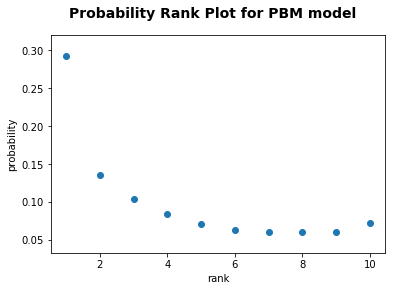

In [45]:
import matplotlib.pyplot as plt
import matplotlib
import pylab

x = [1,2,3,4,5,6,7,8,9,10]
y = [0.2931268584958315, 0.13519935875638853, 0.1031282398292135, 0.08396473213556124, 0.07015549225744785, 0.06246640384082322, 0.06042320473397305, 0.05948457082027777, 0.06023838989635893, 0.0718127492341246]
fig = plt.figure()
fig.suptitle('Probability Rank Plot for PBM model', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
plt.scatter(x,y)
ax.set_xlabel('rank')
ax.set_ylabel('probability')
plt.show()

In [ ]:
"""the graph displays the exponential decay in the examinational probability but based on the Yandex log data it can be 
seen that the rank 10 has higher probability than 9""" 

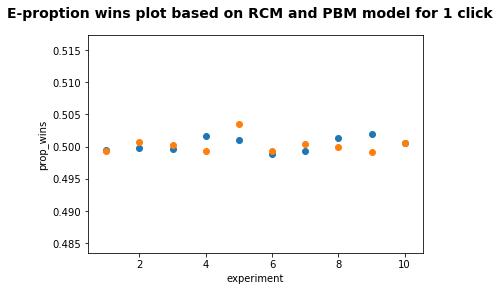

In [36]:
x = [1,2,3,4,5,6,7,8,9,10]
y = [0.49941, 0.49978, 0.49961, 0.50157, 0.50104, 0.49883, 0.499255, 0.501385, 0.50195, 0.50054]
y1=[0.49933, 0.50076, 0.50021, 0.49931, 0.50352, 0.49937, 0.50033, 0.499895, 0.499115, 0.500615]
fig = plt.figure()
fig.suptitle('E-proption wins plot based on RCM and PBM model for 1 click', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
plt.scatter(x,y)
plt.scatter(x,y1)
ax.set_xlabel('experiment')
ax.set_ylabel('prop_wins')
plt.show()

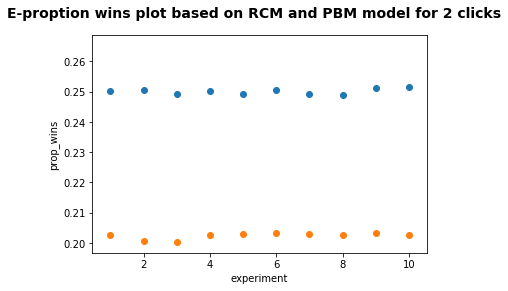

In [37]:
x = [1,2,3,4,5,6,7,8,9,10]
y = [0.25036, 0.250525, 0.24923, 0.250315, 0.24928, 0.250465, 0.24913, 0.248935, 0.251075, 0.25153]
y1=[0.202495, 0.20081, 0.200495, 0.202565, 0.20294, 0.20319, 0.203005, 0.202765, 0.203265, 0.202585]
fig = plt.figure()
fig.suptitle('E-proption wins plot based on RCM and PBM model for 2 clicks', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
plt.scatter(x,y)
plt.scatter(x,y1)
ax.set_xlabel('experiment')
ax.set_ylabel('prop_wins')
plt.show()
"""[0.49984, 0.50091, 0.497055, 0.49845, 0.49991, 0.49943, 0.500045, 0.501, 0.50145, 0.498925]
[0.50056, 0.50002, 0.50055, 0.498055, 0.497745, 0.501135, 0.50124, 0.5006, 0.49858, 0.500185]
[0.49984, 0.50091, 0.497055, 0.49845, 0.49991, 0.49943, 0.500045, 0.501, 0.50145, 0.498925]
[0.50056, 0.50002, 0.50055, 0.498055, 0.497745, 0.501135, 0.50124, 0.5006, 0.49858, 0.500185]"""

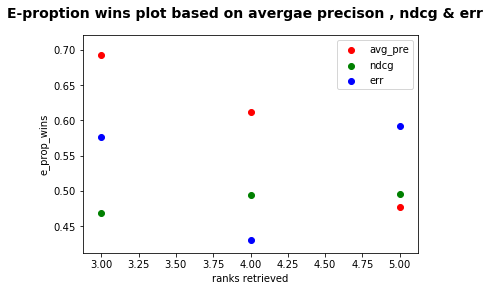

In [35]:

avg_pre_arr=[0.4776475767941206,0.6123480398852615,0.6925409232710575]
ndcg_arr=[0.49507522094043044,0.49372596640356203,0.468764757471497]
err=[0.5922215475949538,0.42978411927410107,0.5768063145112325]
rank_retrieved=[5,4,3]
fig = plt.figure()
fig.suptitle('E-proption wins plot based on avergae precison , ndcg & err', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
plt.scatter(rank_retrieved,avg_pre_arr,c='red',label='avg_pre')
plt.scatter(rank_retrieved,ndcg_arr,c='green',label='ndcg')
plt.scatter(rank_retrieved,err,c='blue',label='err')
ax.set_xlabel('ranks retrieved')
ax.set_ylabel('e_prop_wins')
ax.legend()
plt.show()

In [41]:
"""
As the results were simulated we can see for single click for online models and all rank retrival for offline models 
gives the same result, that is slightly less than 50 % wins for E. The reason being since the simulations give 50 % chances
chances to both E and P and there are cases in which E=P the probablity of E wins will be slightly less than 50 %. Both the
offline and online midels predict it. For online we ran multiple simulations and result is approximately same every time , for oofline 
it was not required as there were no random clicks 

We can also see for offline models if the rank retrival is less than total rank reterival then the proption wins for e
by only ndcg models are stable whereas for the other models proption varies.

For the online models we ran 200000 simulations for each click type. that is user for each page makes 1 ,2,3 or 4 clicks . It was observed that
for odd clicks the e_wins were close to 50 % where as for even clicks the wins were close to 25% and there is deviation 
in RCM and PBM model when there are even clicks . The RCM models gives E 25 % of wins approximately whereas PBM gives 
20% of the wins". The reason i belive for 50 % and 25 % is because of Team Drafting and the models .We bellieve this is because 
incase of odd since the algorithm results are simulated there is 50 % chance that the last odd item will be either E or P 
where as for even cases 25% is because these are more of edge cases because chances of E or P document are equal so because 
of  randomness this happens .

It can also be seen that offline case varies between 40-69% where as the online varies between 20-50%. Online models are 
more human centric becuase theoritcally 50 % chances are there for E to win but it should decrease with number of odd clicks and
that is what is happening in online models . Also in online models PBM is better than RCm becuase it not only takes position of 
document into account but also the attractiveness based on query and document . For our simulation we didn't make attractiveness
quey based but it was rank based so the highest one had 0.5 attractive and last one 0.2 attractive with each document getting 
-0.03 decrement as we move down """

'\nAs the results were simulated we can see for single click for online models and all rank retrival for offline models \ngives the same result, that is slightly less than 50 % wins for E. The reason being since the simulations give 50 % chances\nchances to both E and P and there are cases in which E=P the probablity of E wins will be slightly less than 50 %. Both the\noffline and online midels predict it. For online we ran multiple simulations and result is approximately same every time , for oofline \nit was not required as there were no random clicks \n\nWe can also see for offline models if the rank retrival is less than total rank reterival then the proption wins for e\nby only ndcg models are stable whereas for the other models proption varies.\n\nFor the online models we ran 200000 simulations for each click type. that is user for each page makes 1 ,2,3 or 4 clicks . It was observed that\nfor odd clicks the e_wins were close to 50 % where as for even clicks the wins were close t